In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import pandas as pd

# Manually created data for 40 samples
data = pd.DataFrame({
    'height': [
        150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 
        170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 
        150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
        151, 157, 163, 169, 175, 181, 187, 193, 153, 159
    ],
    'weight': [
        50, 52, 54, 55, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 84, 86,
        51, 53, 57, 61, 65, 69, 73, 77, 81, 85,
        52, 55, 59, 63, 67, 71, 75, 79, 54, 58
    ]
})

# Save to CSV
data.to_csv('file.csv', index=False)

# Display the first few rows
print(data.head())


   height  weight
0     150      50
1     152      52
2     154      54
3     156      55
4     158      56


In [22]:
df = pd.read_csv('file.csv')

Text(0, 0.5, 'height')

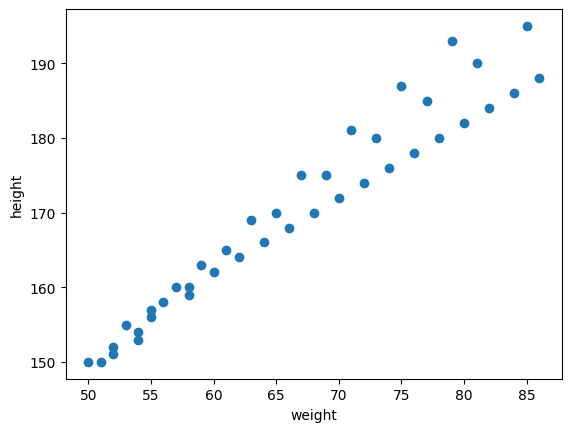

In [23]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')

In [24]:
x = df[['weight']]
y = df['height']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

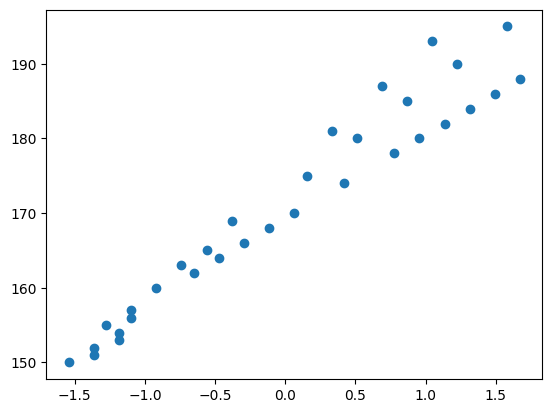

In [29]:
plt.scatter(X_train,y_train)

In [30]:
# train the simple linear regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
regressor.coef_ # slope

array([13.18775079])

In [34]:
regressor.intercept_ # intercept with 0

np.float64(171.03125)

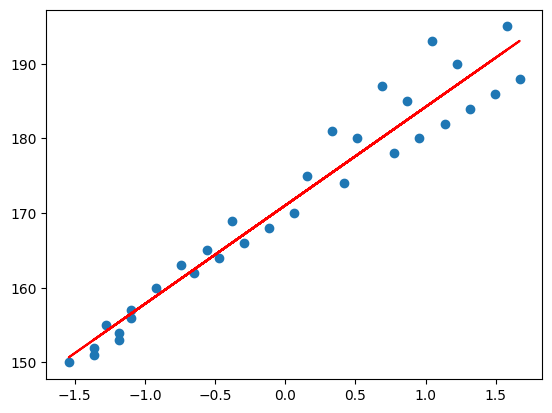

In [38]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [39]:
y_pred_test = regressor.predict(X_test)
y_pred_test,y_test

(array([157.74847232, 174.23236263, 151.86136864, 168.34525895,
        160.10331379, 160.10331379, 178.94204557, 170.70010042]),
 4     158
 11    172
 20    150
 24    170
 5     160
 39    159
 13    176
 34    175
 Name: height, dtype: int64)

In [41]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(f"{mse} {mae} {rmse}")



4.952789233043569 1.806071592598645 2.2254862913627593


In [43]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred_test)
score

0.9371074383105579

In [44]:
scaler_weight = scaler.transform([[80]])
scaler_weight

C:\Users\vaibh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.13554769]])

In [45]:
pred_1 = regressor.predict(scaler_weight)
pred_1

array([186.00656999])

In [46]:
residual = y_test-y_pred_test
residual

4     0.251528
11   -2.232363
20   -1.861369
24    1.654741
5    -0.103314
39   -1.103314
13   -2.942046
34    4.299900
Name: height, dtype: float64

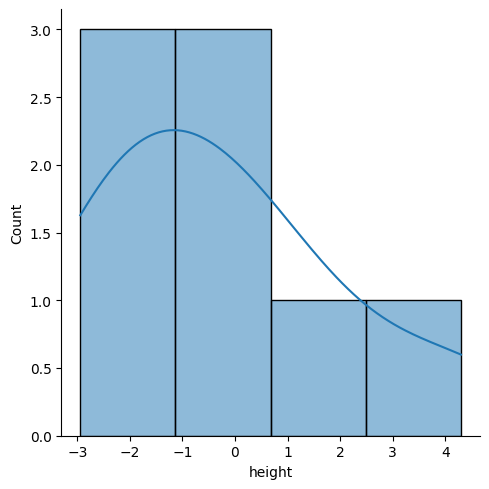

In [47]:
import seaborn as sns
sns.displot(residual,kde=True)